In [7]:
%%capture
!pip install prophet
!pip install -U statsmodels
!pip install colorama

In [8]:
##Importing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose as sd
from scipy import stats 
from statsmodels.graphics.gofplots import qqplot as qq
from scipy.stats import kurtosis
import scipy
from statsmodels.tsa.stattools import adfuller
from pylab import rcParams
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pandas.core.window.rolling import Rolling
from sklearn.model_selection import train_test_split as split
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
import warnings
import itertools
warnings.filterwarnings("ignore")
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error
from sklearn.model_selection import KFold, ShuffleSplit, StratifiedKFold, StratifiedShuffleSplit, TimeSeriesSplit
from prophet import Prophet
from IPython import display
from matplotlib import pyplot
import os
import re
from colorama import Fore, Back, Style
import seaborn as sns
import plotly.express as px
import warnings
from matplotlib.patches import Patch
# ! pip install plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, GRU

from itertools import cycle

In [9]:
##Matplotlib Parameters
import matplotlib.ticker as ticker
rcParams['axes.labelsize'] = 12
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12
plt.style.context('fivethirtyeight')

In [10]:
data = pd.read_csv("AAPL.csv");

In [11]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


In [12]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2.011000e+03
mean,126.707469,127.827594,125.580258,126.741235,119.505548,5.949670e+07
std,50.483753,50.926301,50.124940,50.578369,52.438444,4.683856e+07
min,55.424286,57.085712,55.014286,55.790001,48.921928,1.136200e+07
25%,85.882858,86.717858,85.056427,86.202145,75.056679,2.758565e+07
50%,113.050003,114.190002,111.870003,113.050003,105.222908,4.346900e+07
75%,165.190002,167.409996,163.424995,165.245002,160.047111,7.471030e+07
max,291.119995,293.970001,288.119995,291.519989,289.522614,3.765300e+08


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2011 non-null   object 
 1   Open       2011 non-null   float64
 2   High       2011 non-null   float64
 3   Low        2011 non-null   float64
 4   Close      2011 non-null   float64
 5   Adj Close  2011 non-null   float64
 6   Volume     2011 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 110.1+ KB


In [14]:
# Checking Data type of each column
print("Date column data type: ", type(data['Date'][0]))
print("Open column data type: ", type(data['Open'][0]))
print("Close column data type: ", type(data['Close'][0]))
print("High column data type: ", type(data['High'][0]))
print("Low column data type: ", type(data['Low'][0]))

Date column data type:  <class 'str'>
Open column data type:  <class 'numpy.float64'>
Close column data type:  <class 'numpy.float64'>
High column data type:  <class 'numpy.float64'>
Low column data type:  <class 'numpy.float64'>


In [15]:
data['Date']

0       2012-01-03
1       2012-01-04
2       2012-01-05
3       2012-01-06
4       2012-01-09
           ...    
2006    2019-12-23
2007    2019-12-24
2008    2019-12-26
2009    2019-12-27
2010    2019-12-30
Name: Date, Length: 2011, dtype: object

In [16]:

data['Date'] = pd.to_datetime(data['Date'],format='%Y-%m-%d')

In [17]:
##Making Date as Index 
data.set_index('Date',inplace=True)


In [18]:
data['Date'] =  data.index

In [19]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200,2012-01-03
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500,2012-01-04
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400,2012-01-05
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200,2012-01-06
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100,2012-01-09


In [20]:
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Date         0
dtype: int64

In [21]:
data.dropna(inplace = True)

In [22]:
print("Starting date: ",data.iloc[0][0])
print("Ending date: ", data.iloc[-1][0])
print("Duration: ", data.iloc[-1][0]-data.iloc[0][0])

Starting date:  58.485714
Ending date:  289.459991
Duration:  230.974277


In [23]:
monthvise= data.groupby(data['Date'].dt.strftime('%B'))[['Open','Close']].mean().sort_values(by='Close')
monthvise.head()

,Open,Close
Date,,
January,108.591297,108.566214
February,112.602078,112.840974
March,119.156412,119.128547
April,120.974871,120.968503
May,123.059776,123.232276


In [24]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Stock actual, open and close price')
fig.show()

In [25]:
monthvise_high= data.groupby(data['Date'].dt.strftime('%B'))['High'].max()
monthvise_low= data.groupby(data['Date'].dt.strftime('%B'))['Low'].min()

In [26]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low stock price')
fig.show()

In [27]:
##visualizing

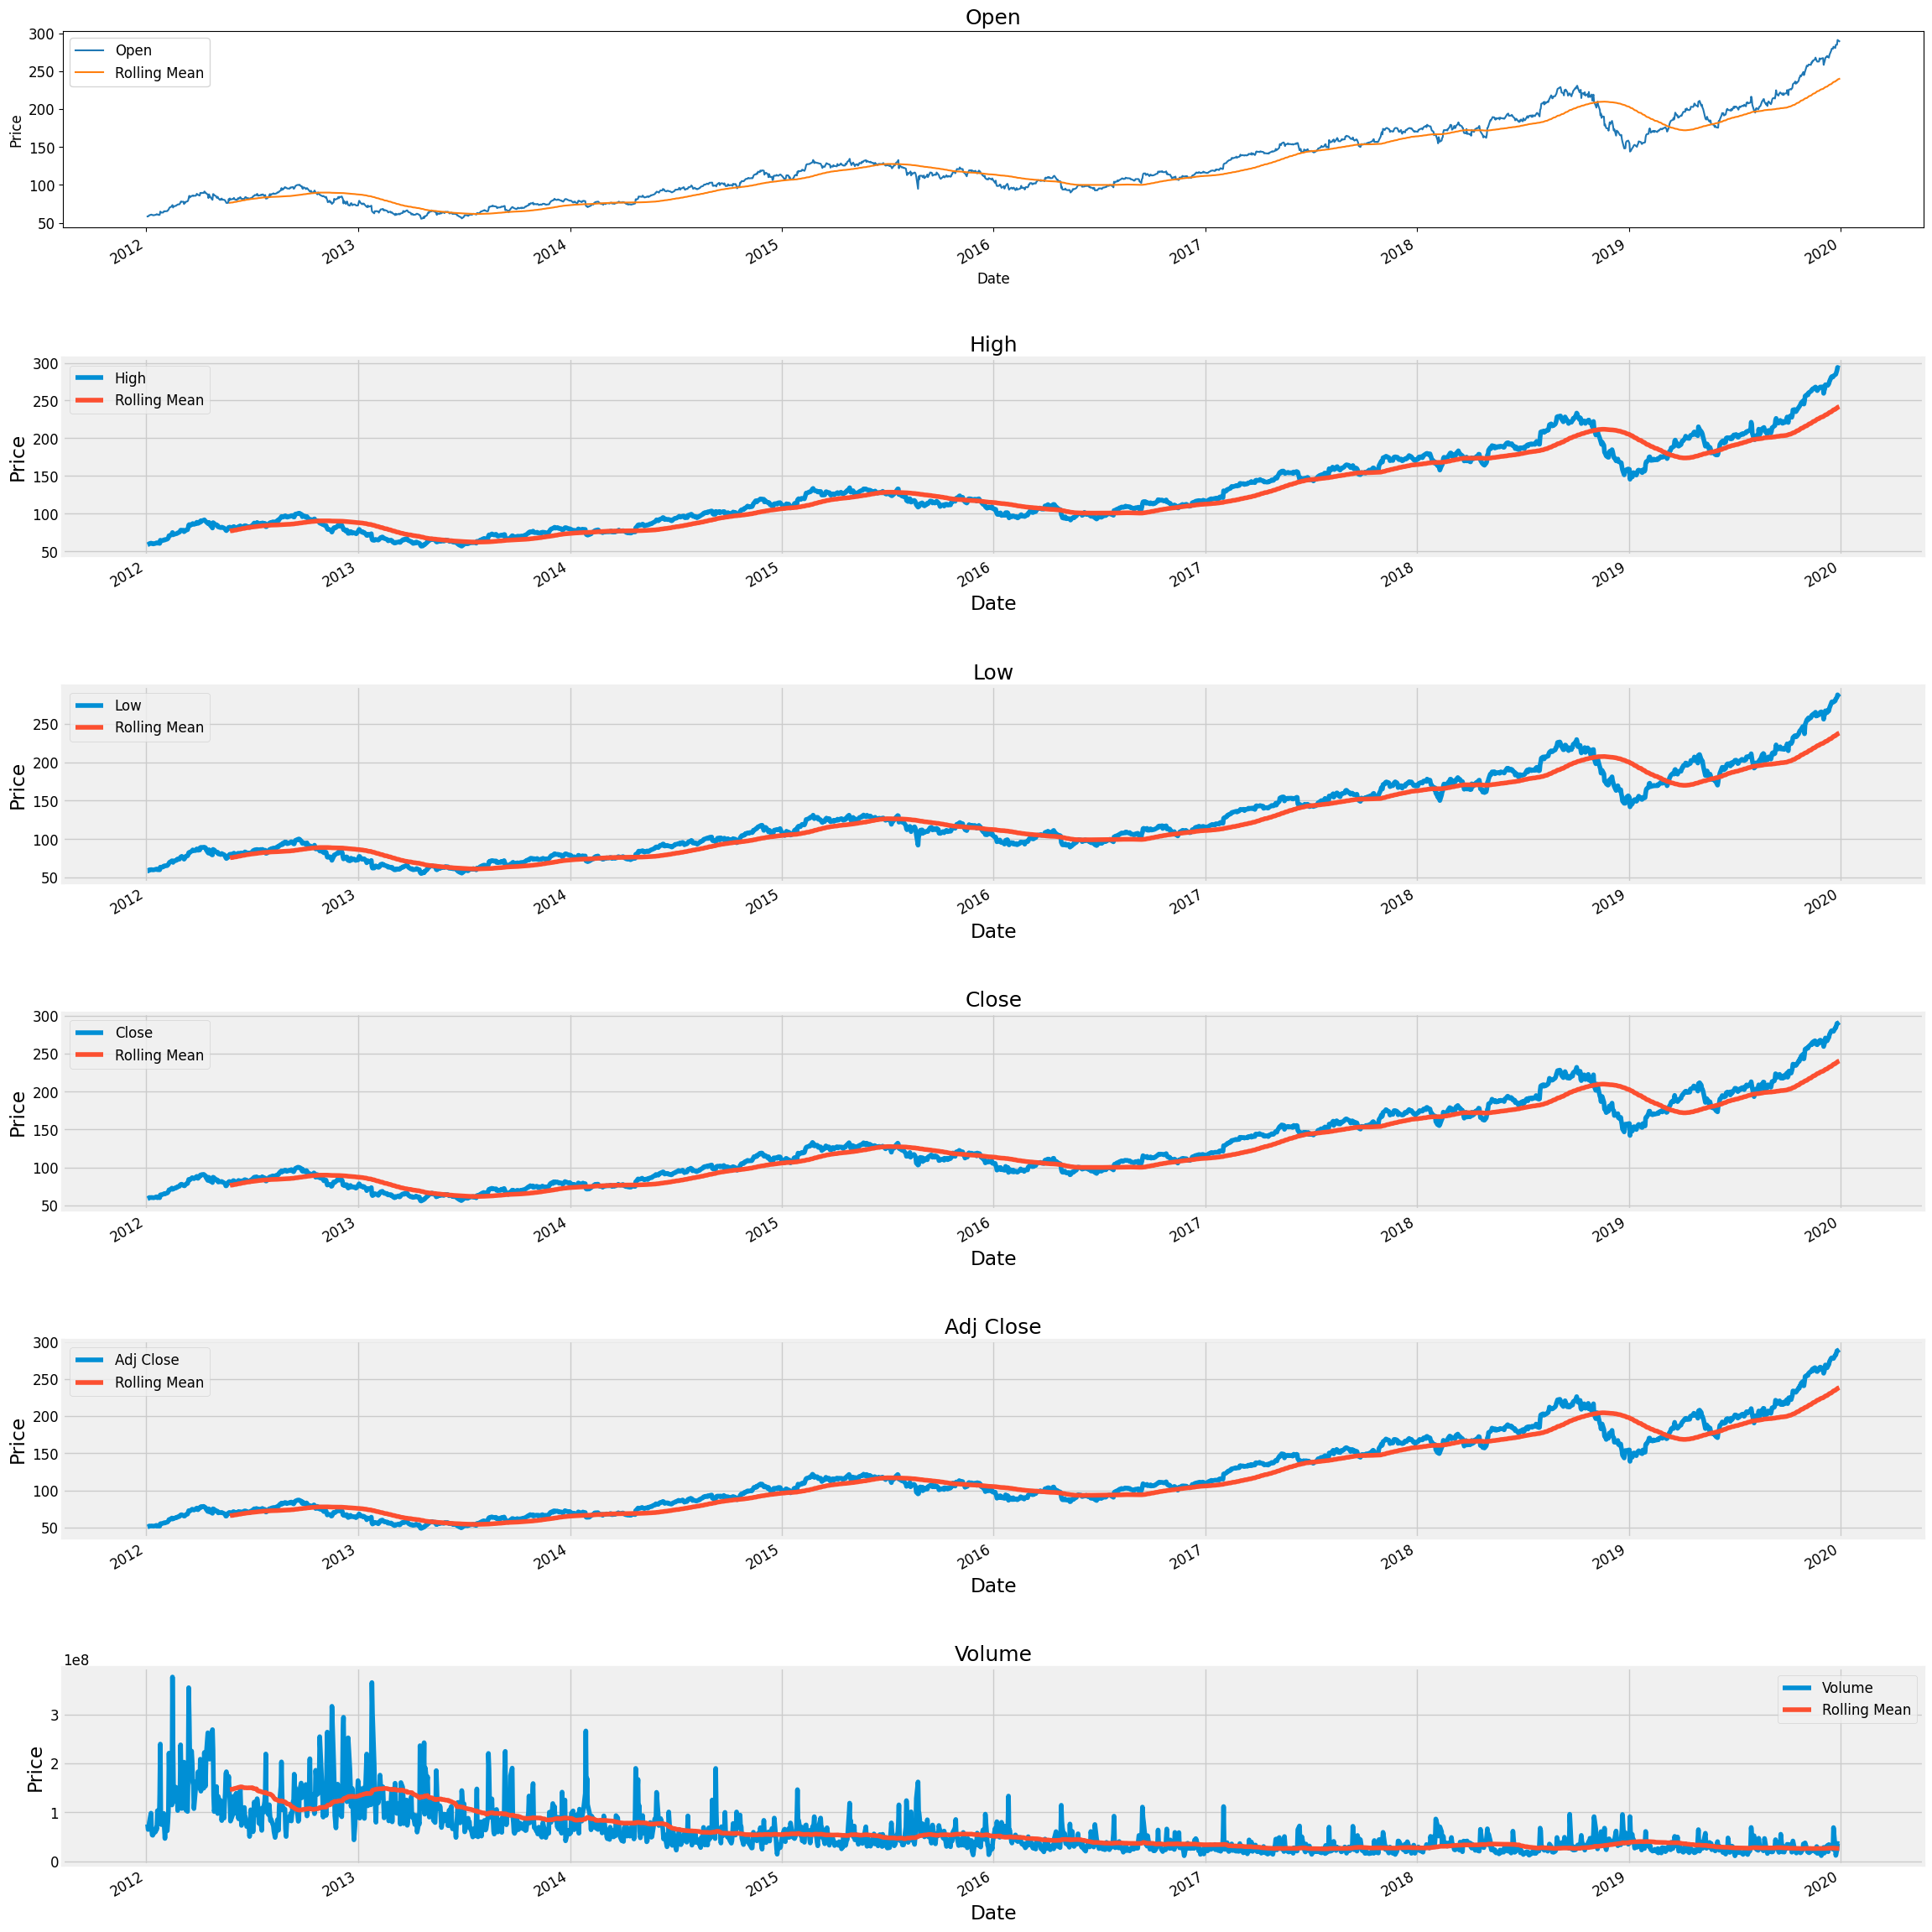

In [28]:
col_names = data.columns

fig = plt.figure(figsize=(24, 24))
for i in range(6):
  ax = fig.add_subplot(6,1,i+1)
  ax.plot(data.iloc[:,i],label=col_names[i])
  data.iloc[:,i].rolling(100).mean().plot(label='Rolling Mean')
  ax.set_title(col_names[i],fontsize=18)
  ax.set_xlabel('Date')
  ax.set_ylabel('Price')
  ax.patch.set_edgecolor('black')  
  plt.style.context('fivethirtyeight')
  plt.legend(prop={'size': 12})
  plt.style.use('fivethirtyeight')

fig.tight_layout(pad=3.0)

plt.show()

In [29]:

names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(data, x=data.Date, y=[data['Open'], data['Close'], 
                                          data['High'], data['Low']],
             labels={'date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

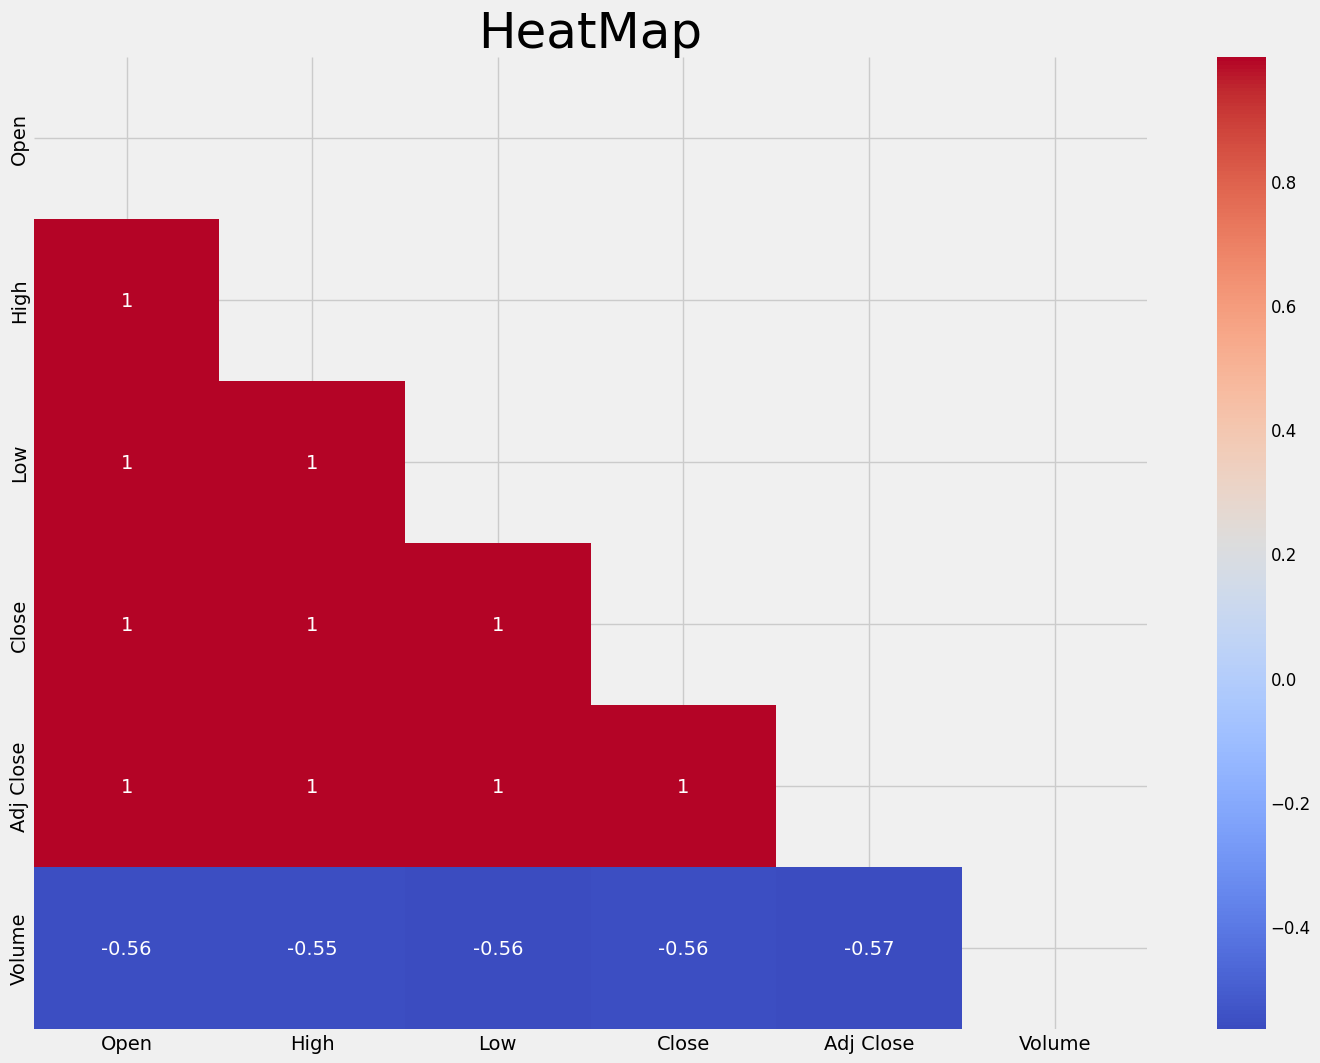

In [30]:
##HeatMap to Verify Multicollinearity between Features
fig = plt.figure(figsize=(16,12))
matrix = np.triu(data.corr())
ax = sns.heatmap(data.corr(),annot=True,annot_kws={"size":14},mask=matrix,cmap='coolwarm')
ax.tick_params(labelsize=14)
sns.set(font_scale=3)
ax.set_title('HeatMap')
plt.style.use('fivethirtyeight')
plt.show()

In [31]:
##Data after feature selection
data_feature_selected = data.drop(axis=1,labels=['Open','High','Low','Close','Volume'])



In [32]:
col_order = ['Date','Adj Close']
data_feature_selected = data_feature_selected.reindex(columns=col_order)
data_feature_selected

,Date,Adj Close
Date,,
2012-01-03,2012-01-03,50.765709
2012-01-04,2012-01-04,51.038536
2012-01-05,2012-01-05,51.605175
2012-01-06,2012-01-06,52.144630
2012-01-09,2012-01-09,52.061932
...,...,...
2019-12-23,2019-12-23,282.054138
2019-12-24,2019-12-24,282.322266
2019-12-26,2019-12-26,287.923645


In [33]:
##Resample Data to Monthly instead of Daily by Aggregating Using Mean
monthly_mean = data_feature_selected['Adj Close'].resample('M').mean()

In [34]:

monthly_data = monthly_mean.to_frame()
monthly_data

,Adj Close
Date,
2012-01-31,52.907298
2012-02-29,61.424381
2012-03-31,71.292448
2012-04-30,74.810151
2012-05-31,69.708045
...,...
2019-08-31,202.738817
2019-09-30,215.853332
2019-10-31,232.974974


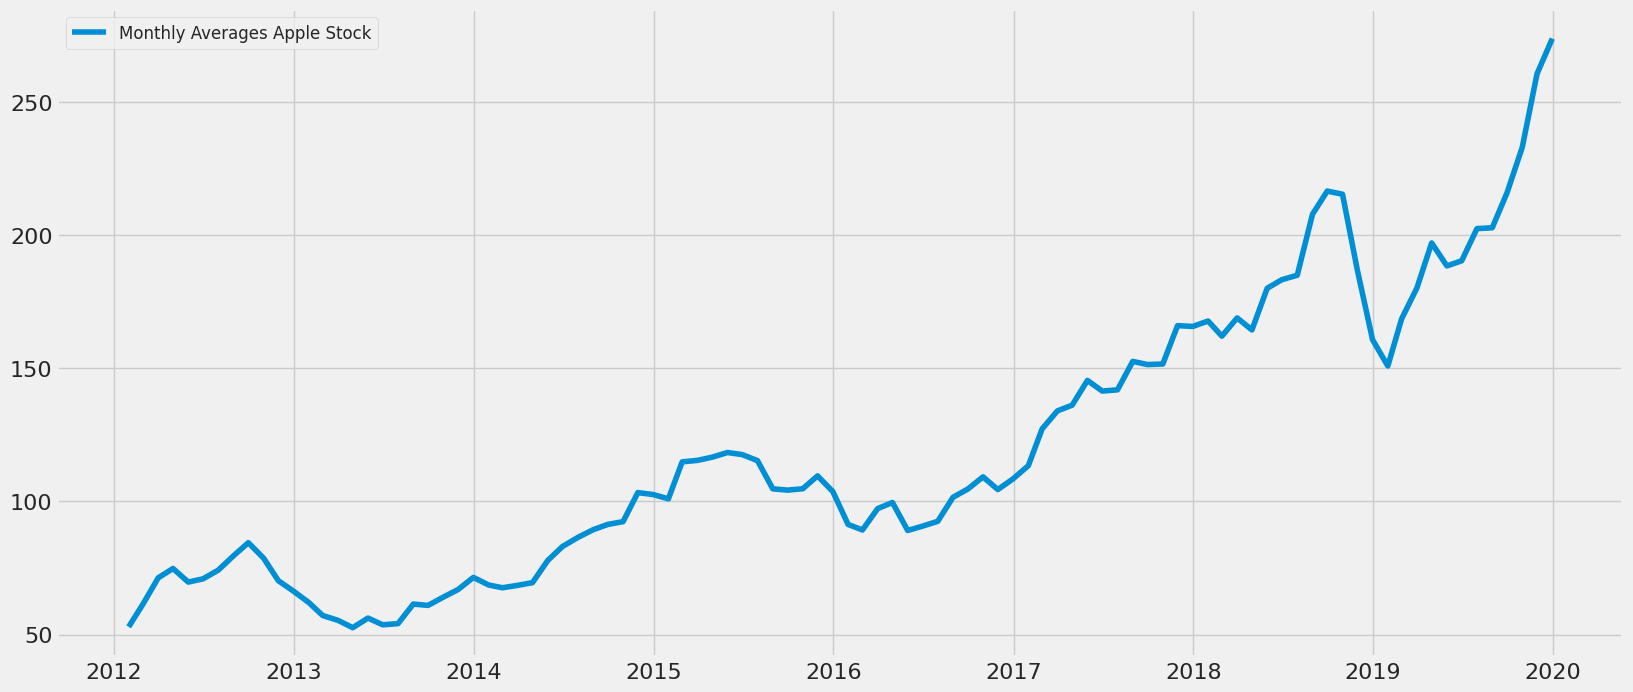

In [35]:

##Monthly Stock Price 
fig = plt.figure(figsize=(18,8))
plt.plot(monthly_data['Adj Close'],label='Monthly Averages Apple Stock')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.set_title('Monthly Resampled Data')
plt.style.use('fivethirtyeight')
plt.legend(prop={'size': 12})
plt.show()

In [36]:
##EDA

In [37]:
closedf = data[['Date','Close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (2011, 2)


In [38]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.6)
fig.update_layout(title_text='Stock close price chart', plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [39]:
monthly_data['Year'] = monthly_data.index.year
monthly_data['Month'] = monthly_data.index.strftime('%B')
monthly_data['dayofweek'] = monthly_data.index.strftime('%A')
monthly_data['quarter'] = monthly_data.index.quarter
monthly_data
     

,Adj Close,Year,Month,dayofweek,quarter
Date,,,,,
2012-01-31,52.907298,2012,January,Tuesday,1
2012-02-29,61.424381,2012,February,Wednesday,1
2012-03-31,71.292448,2012,March,Saturday,1
2012-04-30,74.810151,2012,April,Monday,2
2012-05-31,69.708045,2012,May,Thursday,2
...,...,...,...,...,...
2019-08-31,202.738817,2019,August,Saturday,3
2019-09-30,215.853332,2019,September,Monday,3
2019-10-31,232.974974,2019,October,Thursday,4


(array([0.   , 0.002, 0.004, 0.006, 0.008, 0.01 , 0.012]),
 [Text(0, 0.0, '0.000'),
  Text(0, 0.002, '0.002'),
  Text(0, 0.004, '0.004'),
  Text(0, 0.006, '0.006'),
  Text(0, 0.008, '0.008'),
  Text(0, 0.01, '0.010'),
  Text(0, 0.012, '0.012')])

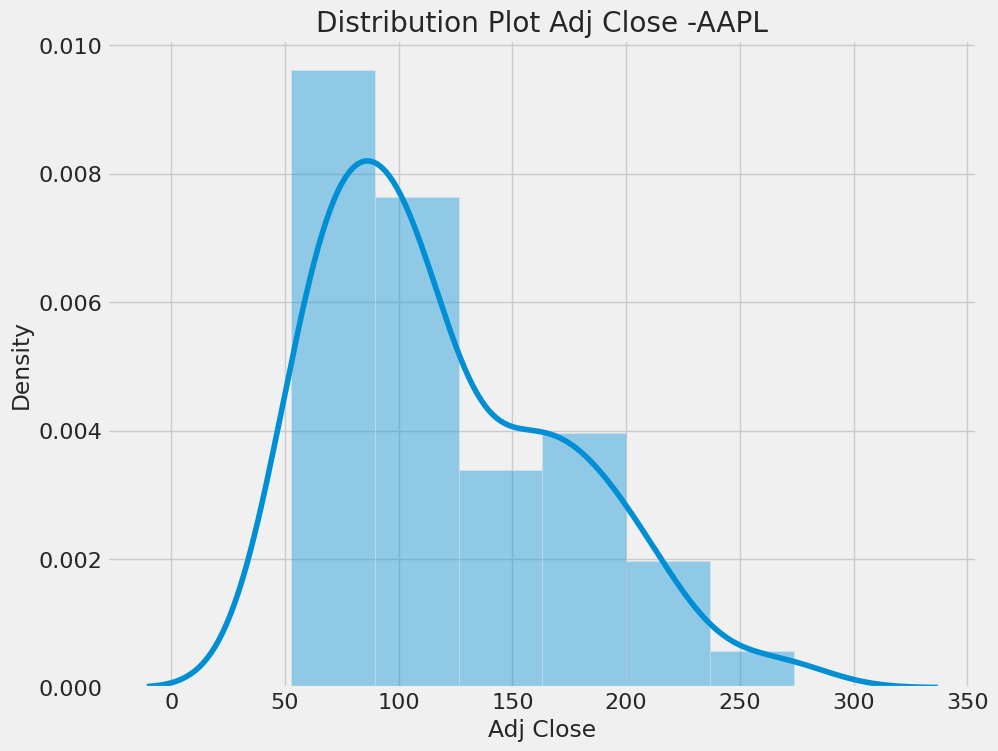

In [40]:

##Checking Distribution of Our Data 
fig = plt.figure(figsize=(10,8))
sns.distplot(monthly_data['Adj Close']).set_title("Distribution Plot Adj Close -AAPL")
ax.tick_params(labelsize=12)
sns.set(font_scale=1)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)


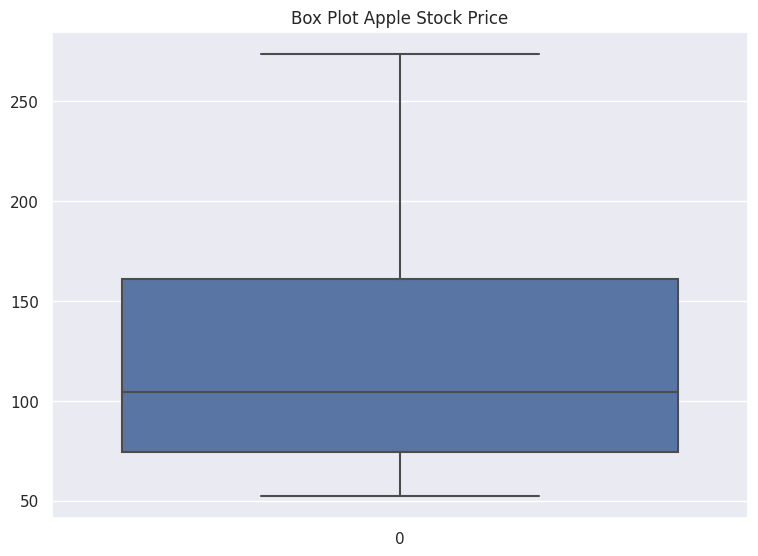

In [41]:
fig = plt.figure(figsize=(8,6))
sns.boxplot(monthly_data['Adj Close']).set_title('Box Plot Apple Stock Price')
plt.style.context('fivethirtyeight')

distribution shows right skew
outlier towards the higher end around stock price of 300$

Text(0.5, 1.0, 'QQ Plot Apple Stock Price')

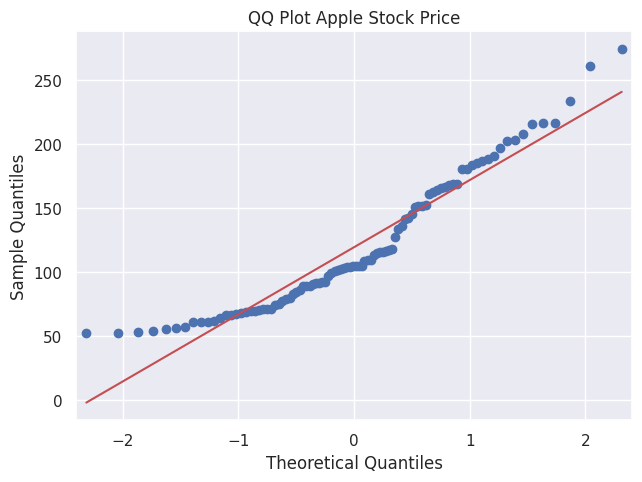

In [42]:
qq_plot = qq(monthly_data['Adj Close'],line='s')
plt.title('QQ Plot Apple Stock Price')

both right and left skews
not following gaussian normal distribution

In [43]:
print('Skewness of Distribution is ',monthly_data['Adj Close'].skew())
print('Kurtosis of Distribution is ',monthly_data['Adj Close'].kurtosis())

Skewness of Distribution is  0.8054131572723979
Kurtosis of Distribution is  -0.11205074257880643


In [44]:
#stock price is heavily skewed-right tailed skewness

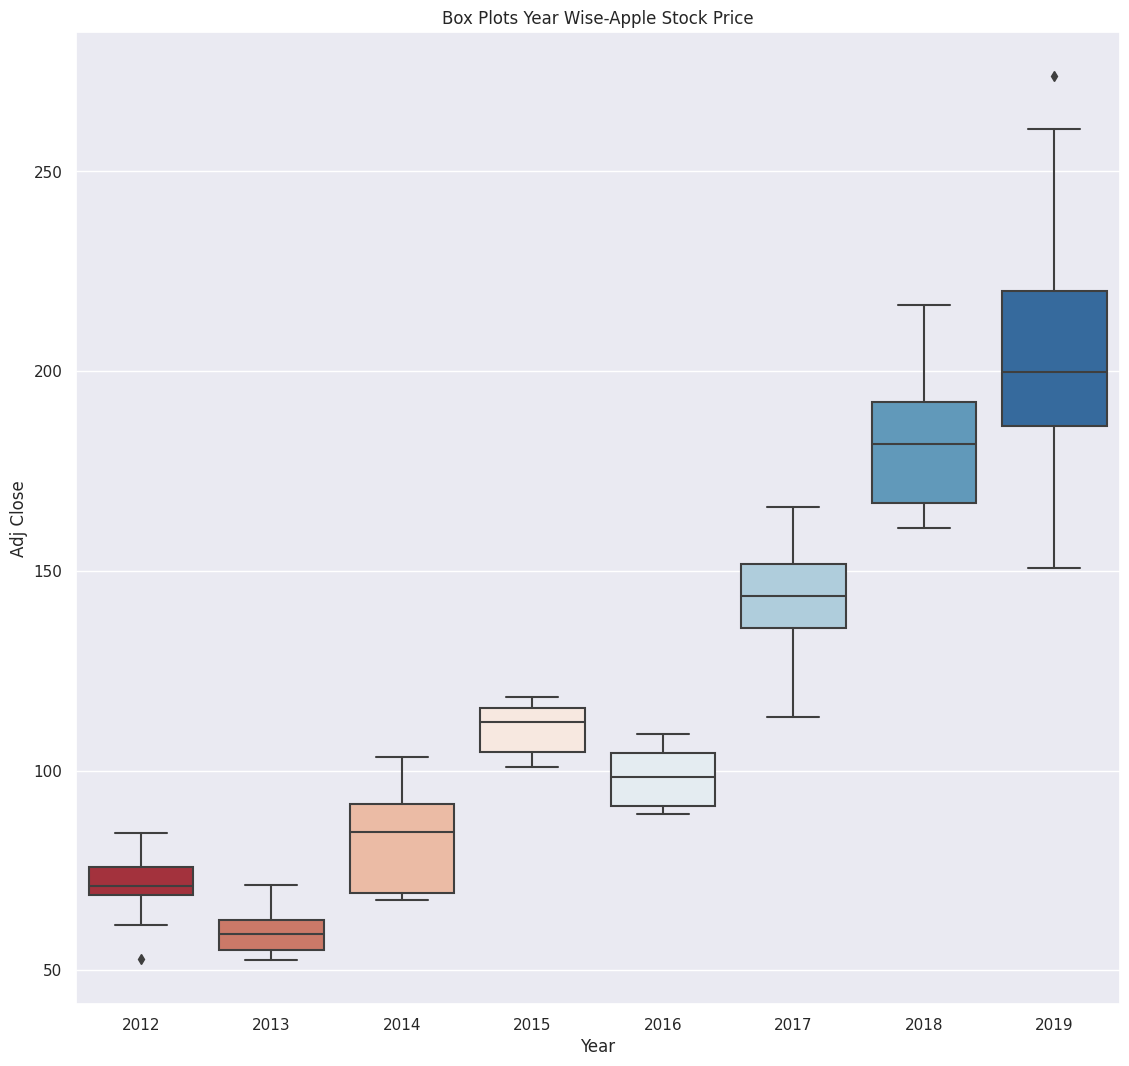

In [45]:

plt.figure(figsize=(12,12))
ax = sns.boxplot(x=monthly_data['Year'],y=monthly_data['Adj Close'],palette='RdBu')
ax.set_title('Box Plots Year Wise-Apple Stock Price')
plt.style.context('fivethirtyeight')

In [46]:
# ->Outliers Present in Year 2012 and 2019

# ->Lot of Variability in Years 2014, 2017-19

# ->2019 most volatile year among all years

# ->Upward Rising Trend is shown

In [47]:

group_by_yr = []
list_years = monthly_data['Year'].unique()
dict_IQR = {}
for yr in list_years:
  group_by_yr.append('df' + str(yr)) 

for enum,yr in enumerate(list_years):
   group_by_yr[enum] = monthly_data[str(yr)]['Adj Close']
   dict_IQR[str(yr)] = stats.iqr(group_by_yr[enum])
     

In [48]:

##Interquartile Range(IQR) Year Wise for Stock Price
dict_IQR

{'2012': 6.933146515313851,
 '2013': 7.476562772903726,
 '2014': 22.34296344824017,
 '2015': 11.10740590584416,
 '2016': 13.310573720864653,
 '2017': 16.22455365139379,
 '2018': 25.26202036594205,
 '2019': 33.78399483999857}

Text(0, 0.5, 'InterQuartile Range')

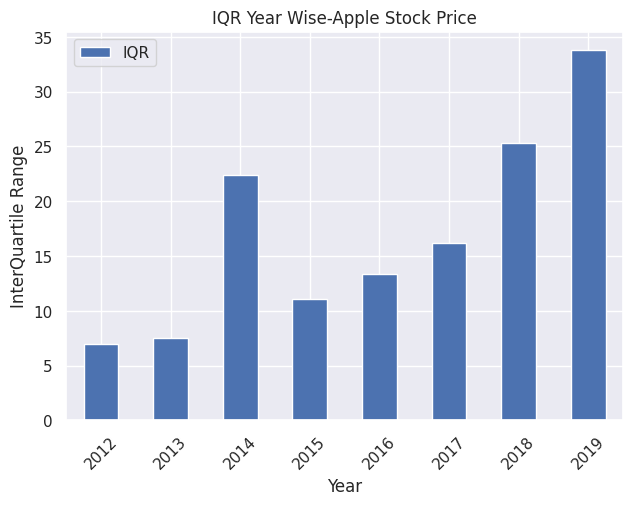

In [49]:
IQR_df = pd.DataFrame(dict_IQR.items(),columns=['Year','IQR'])
IQR_df.index = IQR_df['Year']
IQR_df.plot(kind='bar')
plt.xticks(rotation=45)
plt.style.context('fivethirtyeight')
plt.title('IQR Year Wise-Apple Stock Price')
plt.ylabel('InterQuartile Range')

->When Data is Not Normal Inter-Quartile Range(IQR) is Better Variability Metric than Standard Deviation as IQR is not affected by outliers.



->As observed with BoxPlot 2014 and 2019 are the most volatile Years for Apple Stock

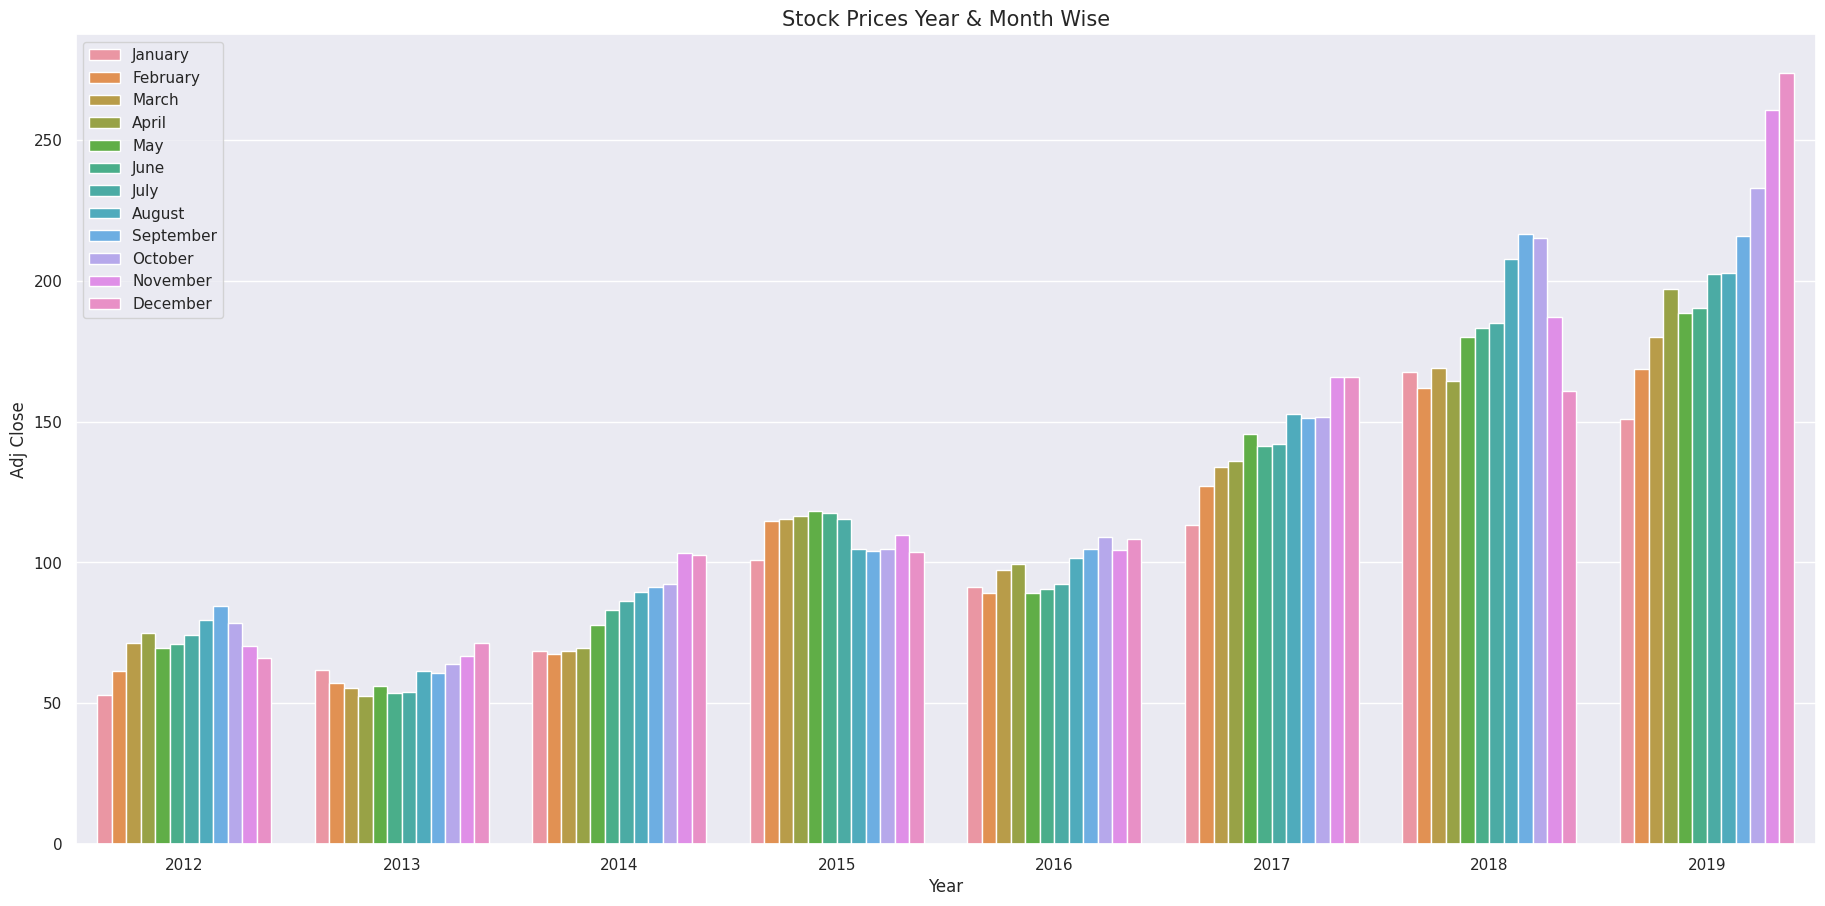

In [50]:
fig, ax = plt.subplots(figsize=(20,10))
palette = sns.color_palette("mako_r", 4)
a = sns.barplot(x="Year", y="Adj Close",hue = 'Month',data=monthly_data)
a.set_title("Stock Prices Year & Month Wise",fontsize=15)
plt.legend(loc='upper left')
plt.show()

Above figure shows that the Period from July-September seems to push stock price above in comparision to other months. 


In [51]:
#Decomposition of Time Series

<Figure size 2000x1600 with 0 Axes>

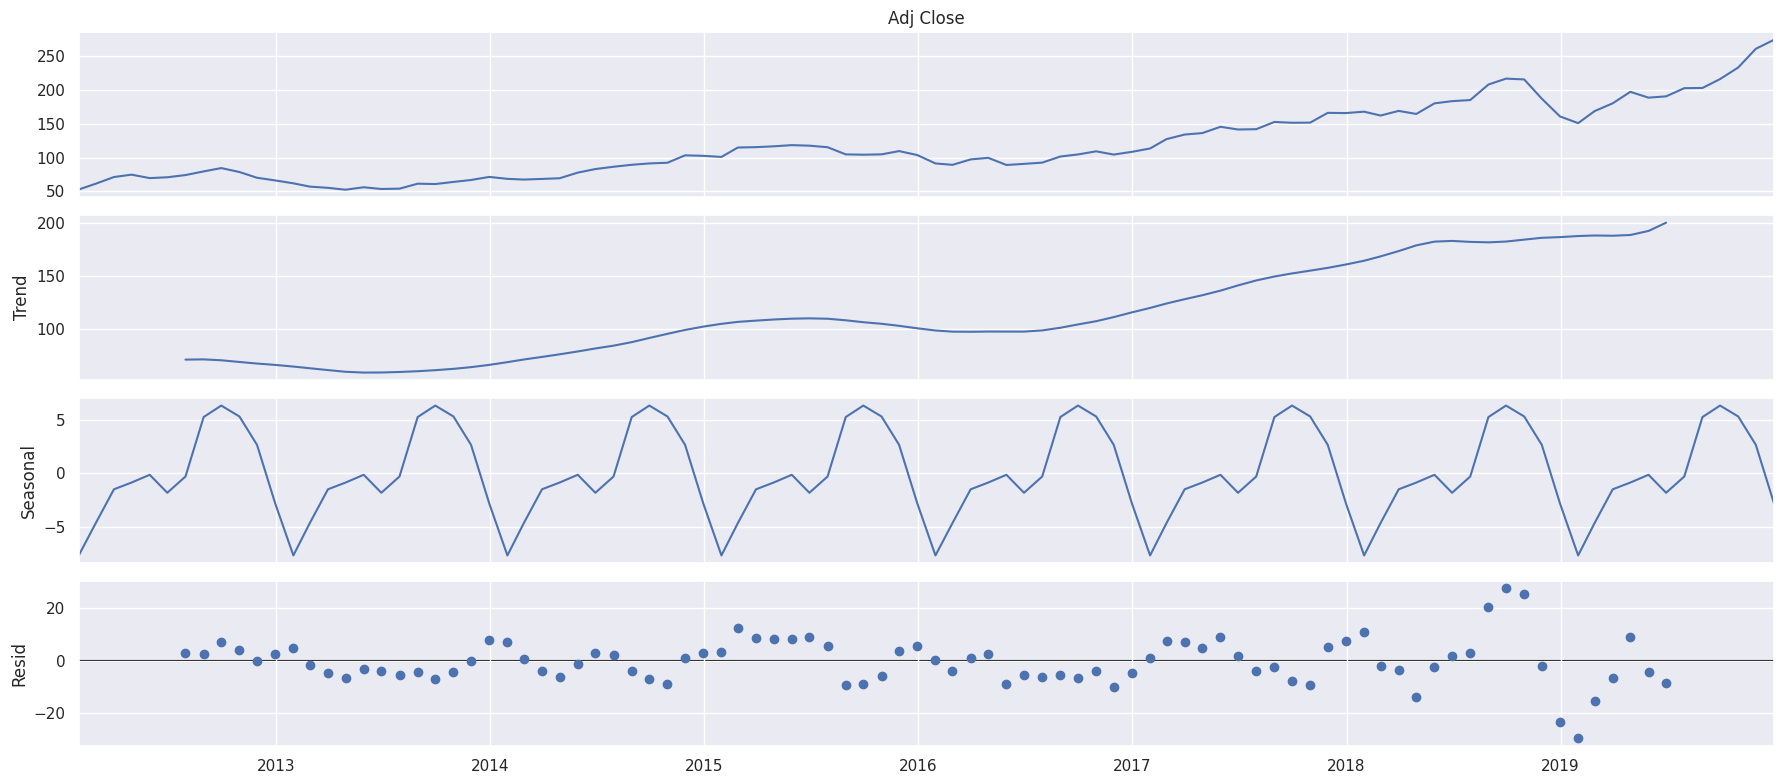

In [52]:
rcParams['figure.figsize'] = 18, 8
plt.figure(figsize=(20,16))
decomposed_series = sd(monthly_data['Adj Close'],model='additive')
decomposed_series.plot()
plt.show()

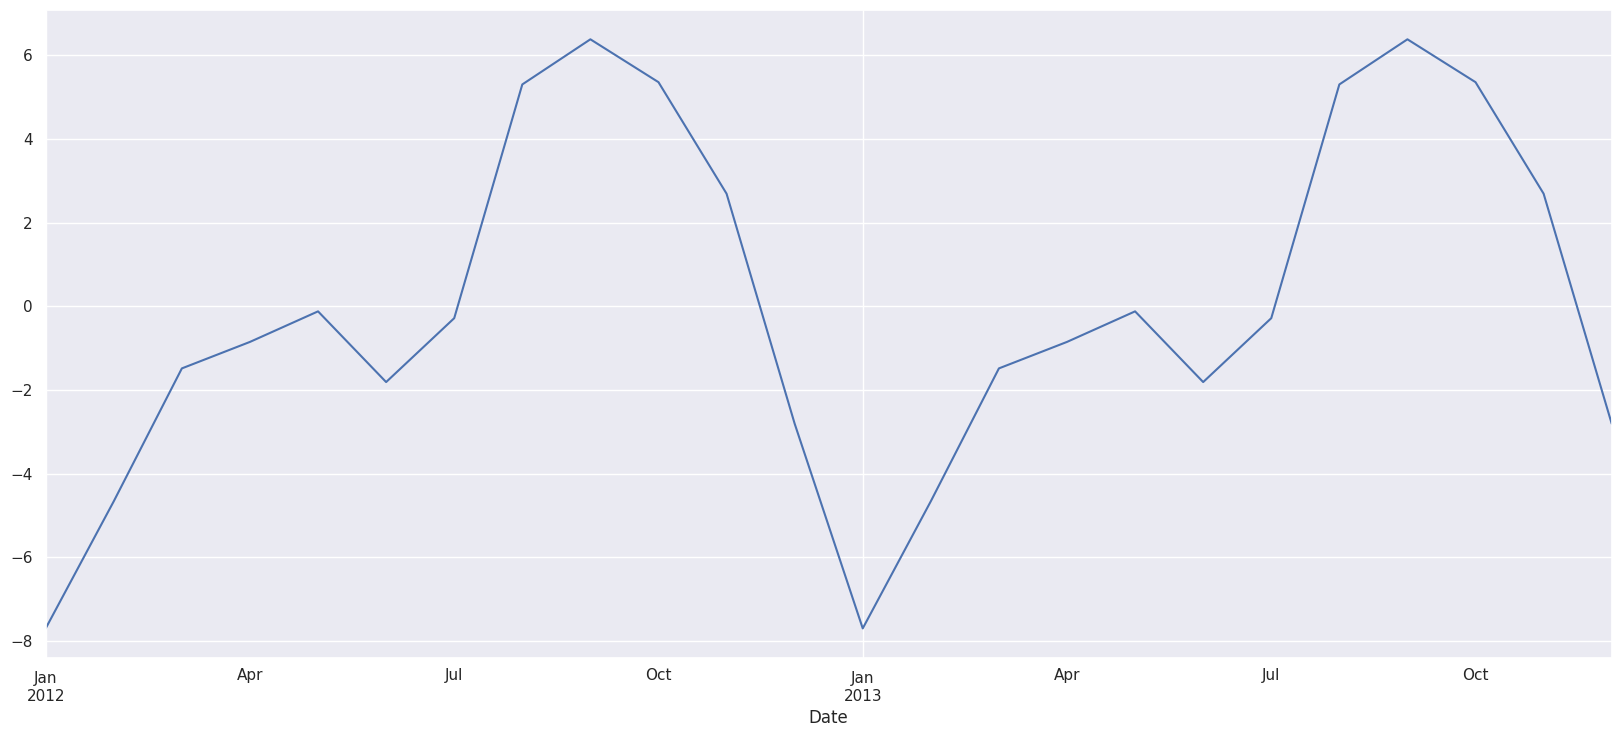

<Figure size 800x800 with 0 Axes>

In [53]:
##Drilling Down and Observing Seasonality
decomposed_series.seasonal['2012':'2013'].plot()
fig = plt.figure(figsize=(8,8))

Stationarity of Time Series
Stationarity Test of Time Series

Using Augmented Dickey-Fuller(ADF) Test

Null Hypothesis : Time series has a unit root -It is non-stationary

Alternate Hypothesis : Time series does not have a unit root -It is stationary

Time Series is Stationary if we have constant mean,constant variance and No Trend and Seasonality.

In [54]:
##ADF Test-Statsmodels Library

def ad_fuller_func(X):
  result_ad_fuller = adfuller(X)
  print('ADF Statistic: %f' % result_ad_fuller[0])
  print('p-value: %f' %result_ad_fuller[1])
  print('Critical Values:')
  for key, value in result_ad_fuller[4].items():
	  print('\t%s: %.3f' % (key, value))
 
  if result_ad_fuller[0] < result_ad_fuller[4]['5%']:
    print('Reject Null Hypothesis(Ho)-Time Series is Stationary')
  else:
    print('Failed to Reject Ho-Time Series is Non-Stationary')

In [55]:

ad_fuller_func(monthly_data['Adj Close'])

ADF Statistic: 1.339253
p-value: 0.996820
Critical Values:
	1%: -3.504
	5%: -2.894
	10%: -2.584
Failed to Reject Ho-Time Series is Non-Stationary


Time Series is Not Stationary as observed earlier also by Decomposition(Trend and Seasonality Present)

Statistically verified by ADF Test

AutoCorrelation Function(ACF)

Text(0.5, 0, 'Lags')

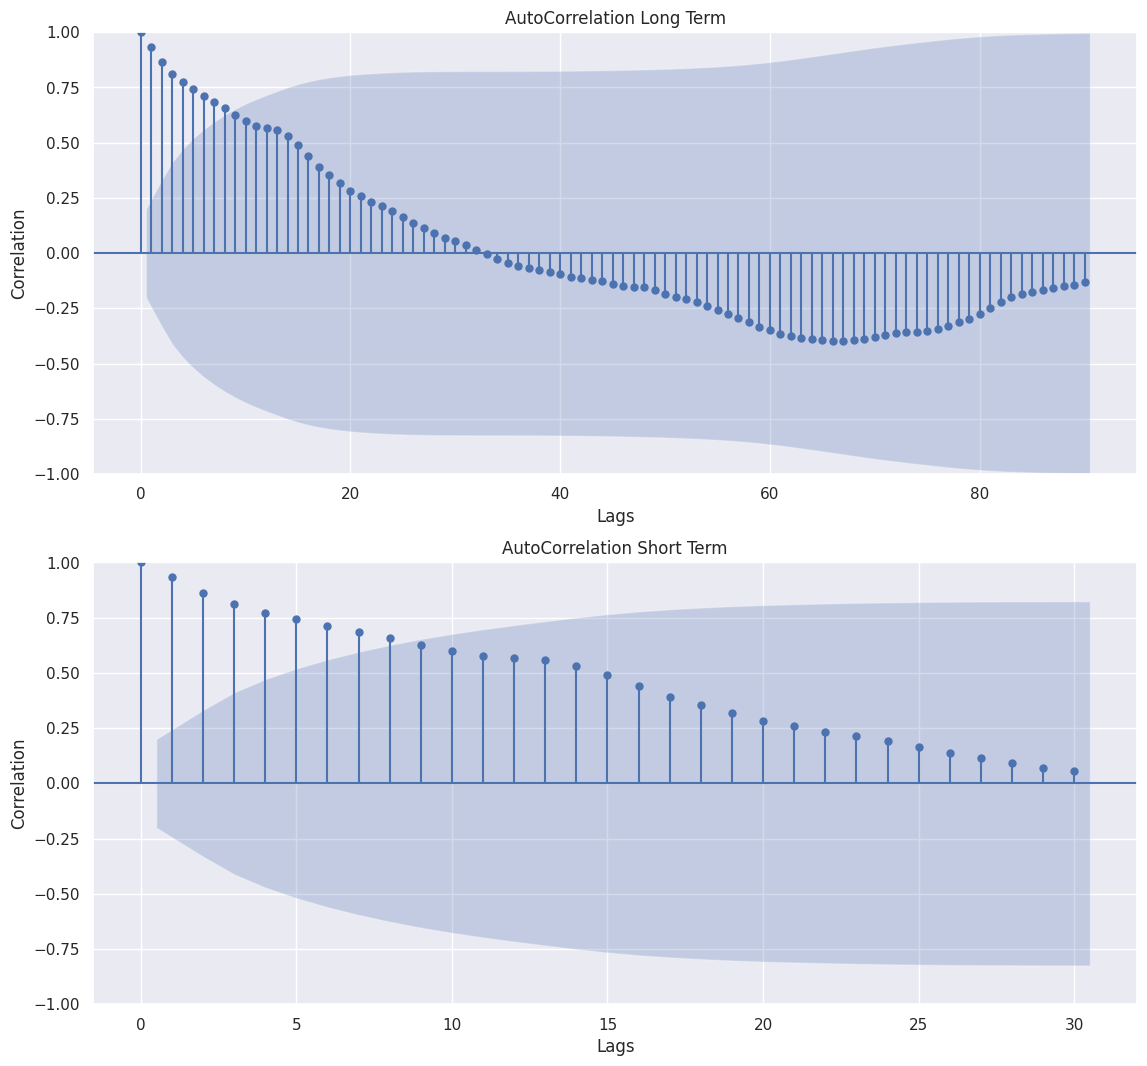

In [56]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(12,12))
acf = plot_acf(monthly_data['Adj Close'],lags=90,ax=ax1)
ax1.set_title('AutoCorrelation Long Term')
acf = plot_acf(monthly_data['Adj Close'],lags=30,ax=ax2)
ax2.set_title('AutoCorrelation Short Term')
ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')

Interpreting ACF Plot :-

->Slow Decay of correlation values indicates that the future values are heavily dependent on the lagged values . This shows that the series is not random and good for time series modelling .

->Also tells us series is Non-stationary

->It indicates a MA(1) process

Interpreting PACF Plot :-

->Sudden Decay at Lag-1

->Order of series seems AR(1)

Transformations To Make Series Stationary

In [59]:
##Differencing By 1
monthly_diff = monthly_data['Adj Close'] - monthly_data['Adj Close'].shift(1)

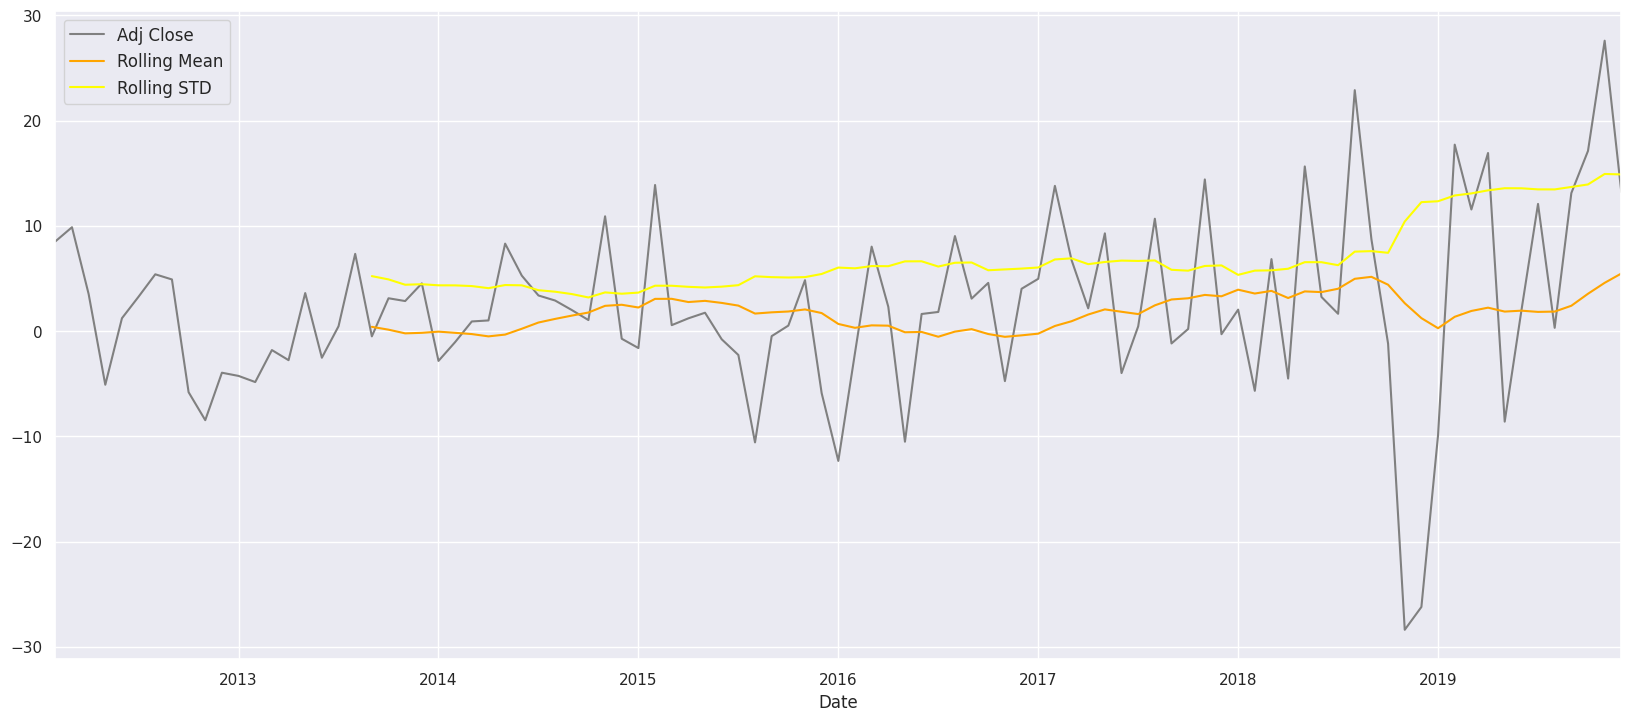

In [60]:
monthly_diff[1:].plot(c='grey')
monthly_diff[1:].rolling(20).mean().plot(label='Rolling Mean',c='orange')
monthly_diff[1:].rolling(20).std().plot(label='Rolling STD',c='yellow')
plt.legend(prop={'size': 12})
     

In [61]:
##Checking if Time Series is Stationary by Running ADF Test
ad_fuller_func(monthly_diff[1:])

ADF Statistic: -6.501865
p-value: 0.000000
Critical Values:
	1%: -3.502
	5%: -2.893
	10%: -2.583
Reject Null Hypothesis(Ho)-Time Series is Stationary


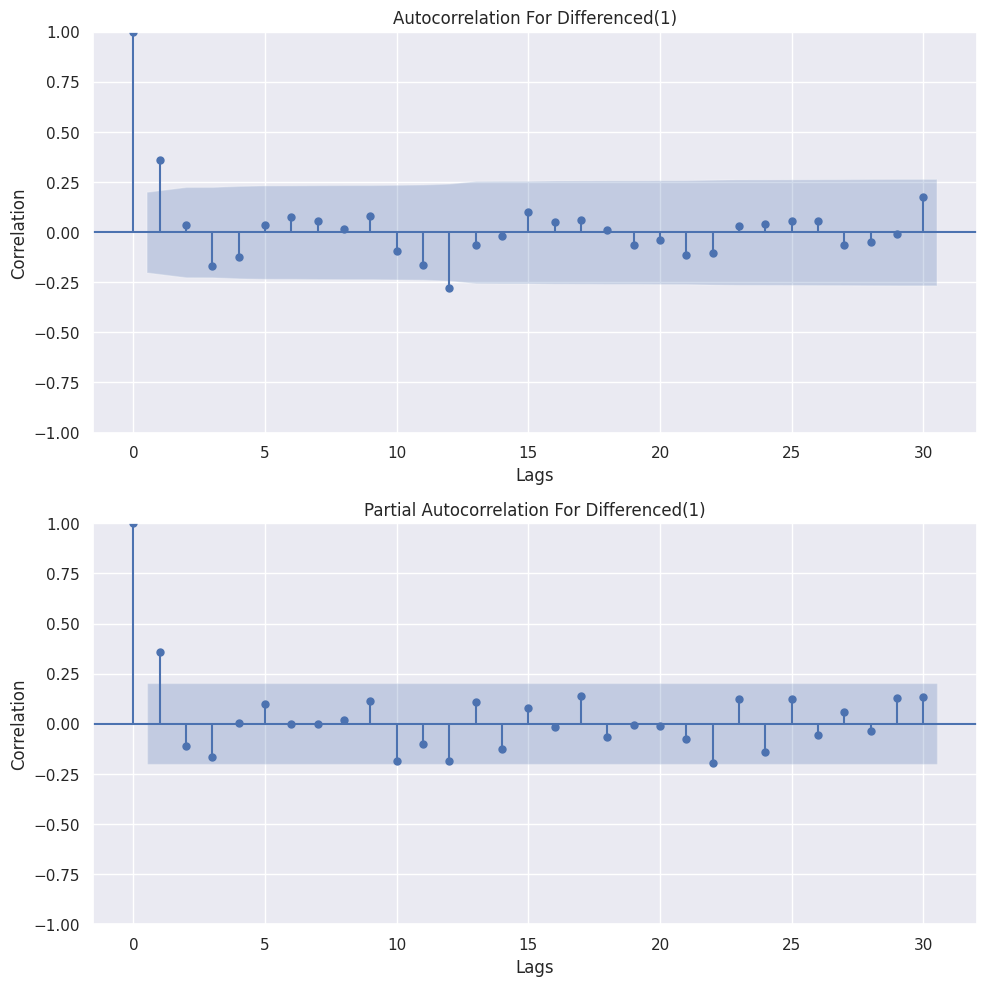

In [62]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(10,10))
acf = plot_acf(monthly_diff[1:],lags=30,ax=ax1)
pacf = plot_pacf(monthly_diff[1:],lags=30,ax=ax2)
ax1.set_title('Autocorrelation For Differenced(1)')
ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_title('Partial Autocorrelation For Differenced(1)')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')
plt.tight_layout(pad=1)

According to the ACF and PACF we can confirm that Differencing once has transformed series into Stationary

Modelling Seasonal ARIMA


In [63]:

modelling_series = monthly_data['Adj Close']
modelling_series

Date
2012-01-31     52.907298
2012-02-29     61.424381
2012-03-31     71.292448
2012-04-30     74.810151
2012-05-31     69.708045
                 ...    
2019-08-31    202.738817
2019-09-30    215.853332
2019-10-31    232.974974
2019-11-30    260.569057
2019-12-31    273.780717
Freq: M, Name: Adj Close, Length: 96, dtype: float64

In [64]:
train,test = split(modelling_series,train_size=0.6,shuffle=False)

In [65]:
train.head(2)

Date
2012-01-31    52.907298
2012-02-29    61.424381
Freq: M, Name: Adj Close, dtype: float64

In [66]:
test.head(2)

Date
2016-10-31    109.212791
2016-11-30    104.453936
Freq: M, Name: Adj Close, dtype: float64

In [67]:
print('Train',len(train))
print('Test',len(test))
    

Train 57
Test 39


In [68]:
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))

SARIMAX: (0, 0, 1) x (0, 0, 1, 12)


In [69]:
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))

SARIMAX: (0, 0, 1) x (0, 0, 1, 12)


Forecasting Seasonal ARIMA

In [70]:

##Data after feature selection
data_feature_selected = data.drop(axis=1,labels=['Open','High','Low','Close','Volume'])

In [71]:


col_order = ['Date','Adj Close']
data_feature_selected = data_feature_selected.reindex(columns=col_order)
data_feature_selected

,Date,Adj Close
Date,,
2012-01-03,2012-01-03,50.765709
2012-01-04,2012-01-04,51.038536
2012-01-05,2012-01-05,51.605175
2012-01-06,2012-01-06,52.144630
2012-01-09,2012-01-09,52.061932
...,...,...
2019-12-23,2019-12-23,282.054138
2019-12-24,2019-12-24,282.322266
2019-12-26,2019-12-26,287.923645


In [72]:
##Resample Data to Monthly instead of Daily by Aggregating Using Mean
monthly_mean = data_feature_selected['Adj Close'].resample('M').mean()
     

In [73]:
monthly_data = monthly_mean.to_frame()
monthly_data

,Adj Close
Date,
2012-01-31,52.907298
2012-02-29,61.424381
2012-03-31,71.292448
2012-04-30,74.810151
2012-05-31,69.708045
...,...
2019-08-31,202.738817
2019-09-30,215.853332
2019-10-31,232.974974


In [74]:
##Getting Data Ready for the Model
prophet_data = monthly_data
prophet_data['Date'] = prophet_data.index
prophet_data

,Adj Close,Date
Date,,
2012-01-31,52.907298,2012-01-31
2012-02-29,61.424381,2012-02-29
2012-03-31,71.292448,2012-03-31
2012-04-30,74.810151,2012-04-30
2012-05-31,69.708045,2012-05-31
...,...,...
2019-08-31,202.738817,2019-08-31
2019-09-30,215.853332,2019-09-30
2019-10-31,232.974974,2019-10-31


In [76]:
prophet_data = prophet_data.reindex(columns=['Date','Adj Close'])

In [77]:
##Prophet needs two columns in form of ds and y being Date and series
prophet_data.rename(columns={'Date':'ds',
                   'Adj Close':'y'},inplace=True)

In [78]:
prophet_data

,ds,y
Date,,
2012-01-31,2012-01-31,52.907298
2012-02-29,2012-02-29,61.424381
2012-03-31,2012-03-31,71.292448
2012-04-30,2012-04-30,74.810151
2012-05-31,2012-05-31,69.708045
...,...,...
2019-08-31,2019-08-31,202.738817
2019-09-30,2019-09-30,215.853332
2019-10-31,2019-10-31,232.974974


In [79]:
##Spliting Train Test 
prophet_train,prophet_test = split(prophet_data,train_size=0.6,shuffle=False)
print('Training Data Size :',len(prophet_train))
print('Testing Data Size :',len(prophet_test))

Training Data Size : 57
Testing Data Size : 39


In [80]:
##Model Fitting Basic Model
prophet_model = Prophet(yearly_seasonality=True)
prophet_model.fit(prophet_train)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphw6jymjy/hvdqkul2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphw6jymjy/pkms9tex.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94855', 'data', 'file=/tmp/tmphw6jymjy/hvdqkul2.json', 'init=/tmp/tmphw6jymjy/pkms9tex.json', 'output', 'file=/tmp/tmphw6jymjy/prophet_modelqr6nhku0/prophet_model-20230528022846.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:28:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:28:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [81]:
future= prophet_model.make_future_dataframe(periods=39,freq='M')

In [82]:
future

,ds
0,2012-01-31
1,2012-02-29
2,2012-03-31
3,2012-04-30
4,2012-05-31
...,...
91,2019-08-31
92,2019-09-30
93,2019-10-31
94,2019-11-30


Forecasting Prophet-Basic Model

In [83]:
##Predicting Using Prophet
forecast=prophet_model.predict(future)
forecast.index = prophet_data['y'].index

In [84]:
prophet_df = pd.concat([forecast['yhat'],prophet_data['y']],axis=1,ignore_index=True)
prophet_df.columns = ['Predicted','Actual']
prophet_df

,Predicted,Actual
Date,,
2012-01-31,51.013636,52.907298
2012-02-29,54.127611,61.424381
2012-03-31,62.093606,71.292448
2012-04-30,64.484538,74.810151
2012-05-31,59.239091,69.708045
...,...,...
2019-08-31,137.032218,202.738817
2019-09-30,138.633781,215.853332
2019-10-31,141.063373,232.974974


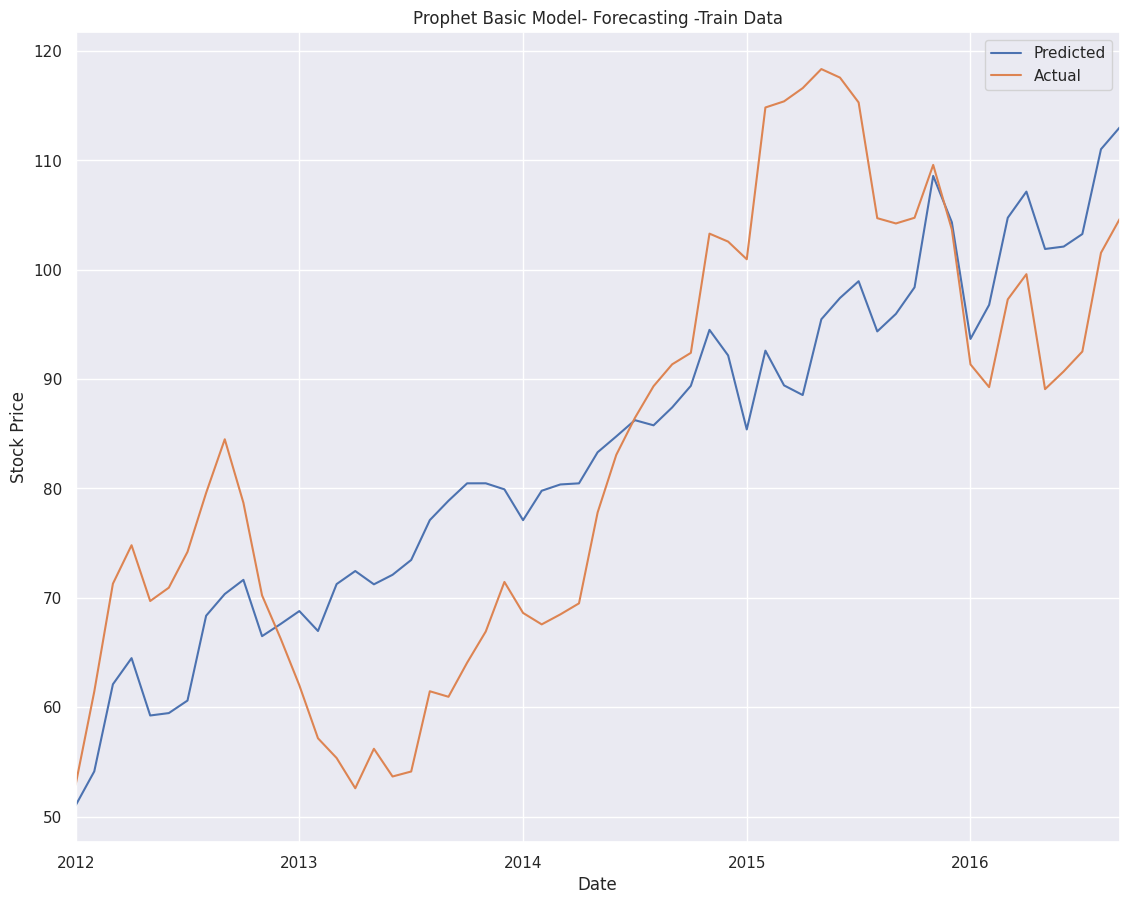

In [85]:
fig = plt.figure(figsize=(12,10))
prophet_df['Predicted'][:57].plot(label='Predicted')
prophet_df['Actual'][:57].plot(label='Actual')
plt.title('Prophet Basic Model- Forecasting -Train Data')
plt.ylabel('Stock Price')
plt.legend()

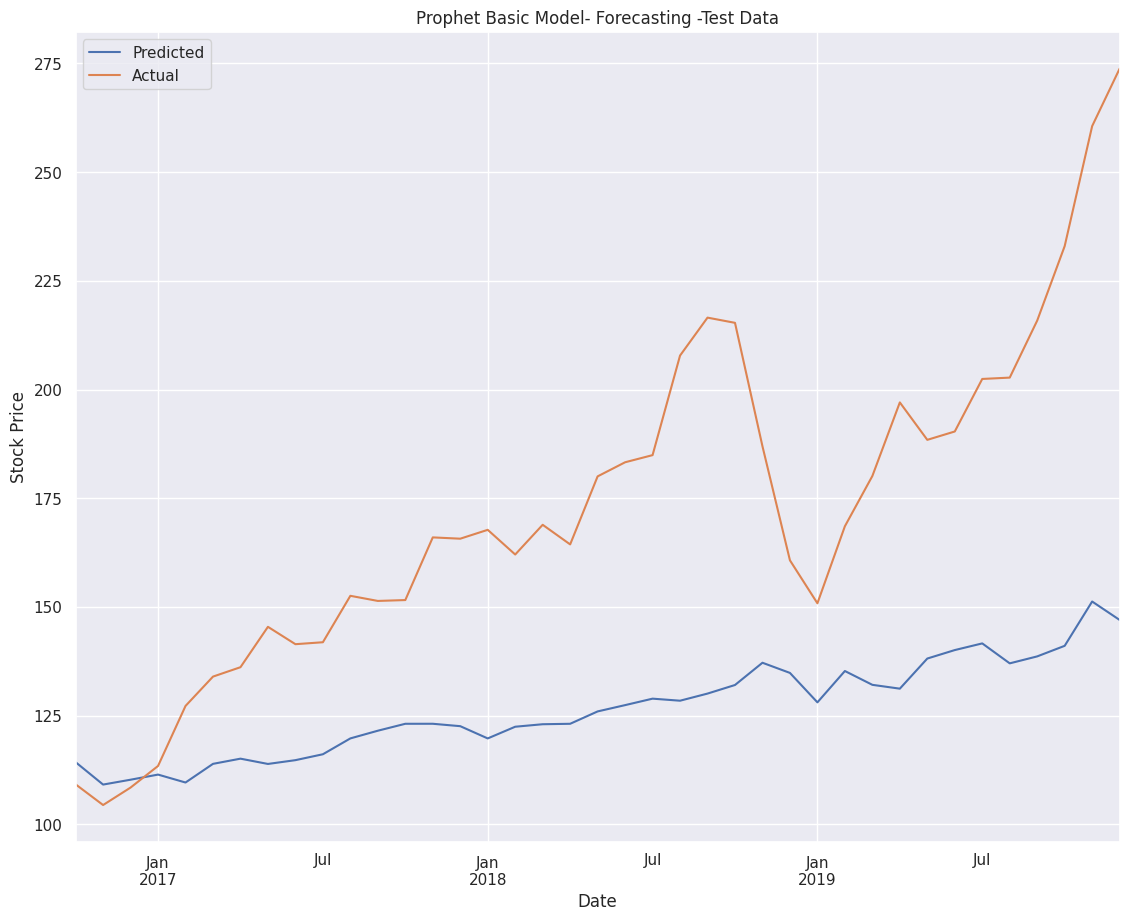

In [86]:
fig = plt.figure(figsize=(12,10))
prophet_df['Predicted'][57:].plot(label='Predicted')
prophet_df['Actual'][57:].plot(label='Actual')
plt.title('Prophet Basic Model- Forecasting -Test Data')
plt.ylabel('Stock Price')
plt.legend()
     

In [89]:
##Function to Calculate Result Metrics
def result_metrics(test_series,forecast_series,model_name):
  print('Result Metrics for {}'.format(model_name))
  print('R2 Score : ',round(r2_score(test_series,forecast_series),3))
  print('Mean Squared Error : ',round(mean_squared_error(test_series,forecast_series),3))
  print('Mean Absolute Error : ',round(mean_absolute_error(test_series,forecast_series),3))

In [90]:
print(result_metrics(prophet_df['Actual'][:57],prophet_df['Predicted'][:57],'Prophet Basic-Train Data'))

Result Metrics for Prophet Basic-Train Data
R2 Score :  0.598
Mean Squared Error :  157.648
Mean Absolute Error :  10.794
None


In [91]:
print(result_metrics(prophet_df['Actual'][57:],prophet_df['Predicted'][57:],'Prophet Basic-Test Data'))

Result Metrics for Prophet Basic-Test Data
R2 Score :  -0.973
Mean Squared Error :  2936.428
Mean Absolute Error :  46.175
None


The Basic Prophet Model with default parameters overfits into the model as represented by the Train Test Accuracy differences.

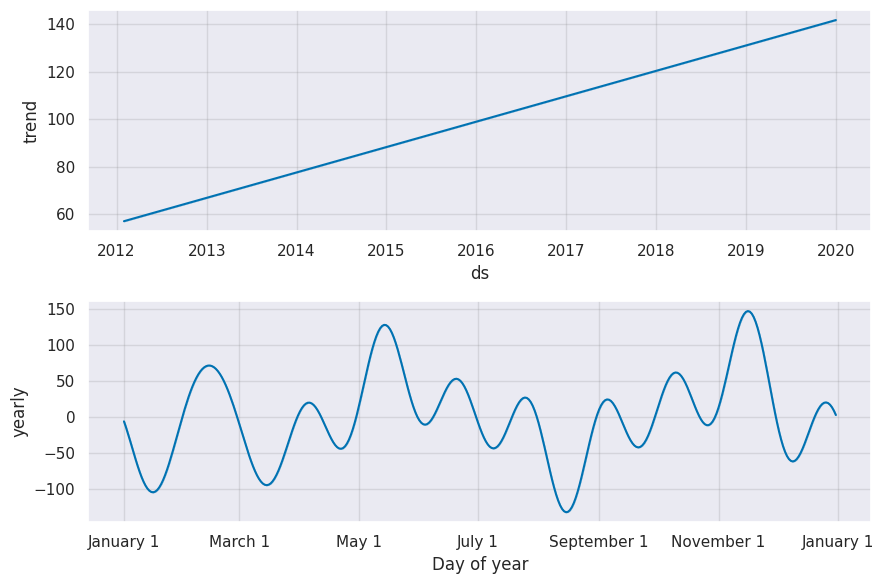

In [92]:
fig = prophet_model.plot_components(forecast)


In [93]:
print('Head',prophet_test.head(1))
print('Tail',prophet_test.tail(1))    

Head                    ds           y
Date                             
2016-10-31 2016-10-31  109.212791
Tail                    ds           y
Date                             
2019-12-31 2019-12-31  273.780717


Hyper-Tuning for Prophet Model

In [94]:

from sklearn.model_selection import ParameterGrid
params_grid = {'seasonality_mode':('multiplicative','additive'),
               'changepoint_prior_scale':[0.3,0.4],
              'holidays_prior_scale':[0.3,0.4],
              'n_changepoints' : [20,50]}
grid = ParameterGrid(params_grid)
cnt = 0
for p in grid:
    cnt = cnt+1

print('Total Possible Models',cnt)

Total Possible Models 16


In [95]:
df = prophet_data 

In [96]:
prophet_train_hyper,prophet_test_hyper = split(prophet_data,train_size=0.7,shuffle=False)

In [97]:
prophet_test_hyper.head(5)

,ds,y
Date,,
2017-08-31,2017-08-31,152.563906
2017-09-30,2017-09-30,151.386422
2017-10-31,2017-10-31,151.586949
2017-11-30,2017-11-30,165.996497
2017-12-31,2017-12-31,165.699087


In [101]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error,mean_absolute_percentage_error, median_absolute_error, mean_squared_log_error

In [102]:
strt='2017-08-31'
end='2019-12-31'
model_parameters = pd.DataFrame(columns = ['MAPE','Parameters'])
for i in grid:
    test = pd.DataFrame()
    print(i)
    
    train_model =Prophet(changepoint_prior_scale = i['changepoint_prior_scale'],
                         holidays_prior_scale = i['holidays_prior_scale'],
                         n_changepoints = i['n_changepoints'],
                         seasonality_mode = i['seasonality_mode'],
                         weekly_seasonality=False,
                         daily_seasonality = False,
                         yearly_seasonality = True,
                         )
    
    train_model.fit(prophet_train_hyper)
    train_forecast = train_model.make_future_dataframe(periods=29, freq='M',include_history = False)
    train_forecast = train_model.predict(train_forecast)
    test=train_forecast[['ds','yhat']]
    Actual = df[(df['ds']>=strt) & (df['ds']<=end)]
    MAPE = mean_absolute_percentage_error(Actual['y'],abs(test['yhat']))
    print('Mean Absolute Percentage Error(MAPE)---------------------------------------------------------',MAPE)
    model_parameters = model_parameters.append({'MAPE':MAPE,'Parameters':p},ignore_index=True)

DEBUG:cmdstanpy:input tempfile: /tmp/tmphw6jymjy/z2wha8ik.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphw6jymjy/xnqqi6vn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4043', 'data', 'file=/tmp/tmphw6jymjy/z2wha8ik.json', 'init=/tmp/tmphw6jymjy/xnqqi6vn.json', 'output', 'file=/tmp/tmphw6jymjy/prophet_modelviue9mo0/prophet_model-20230528023746.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:37:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 20, 'seasonality_mode': 'multiplicative'}


02:37:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmphw6jymjy/ia0qd8ae.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphw6jymjy/g58j4c3q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47382', 'data', 'file=/tmp/tmphw6jymjy/ia0qd8ae.json', 'init=/tmp/tmphw6jymjy/g58j4c3q.json', 'output', 'file=/tmp/tmphw6jymjy/prophet_modeljl8n0511/prophet_model-20230528023747.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:37:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)--------------------------------------------------------- 0.12858727856627644
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 20, 'seasonality_mode': 'additive'}


02:37:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmphw6jymjy/1ilrj_8x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphw6jymjy/izkj_cr_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2908', 'data', 'file=/tmp/tmphw6jymjy/1ilrj_8x.json', 'init=/tmp/tmphw6jymjy/izkj_cr_.json', 'output', 'file=/tmp/tmphw6jymjy/prophet_modelcaygyt_5/prophet_model-20230528023747.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:37:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)--------------------------------------------------------- 0.12319013021035743
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative'}


02:37:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmphw6jymjy/ihg0oig9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphw6jymjy/tdvbdt7y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55149', 'data', 'file=/tmp/tmphw6jymjy/ihg0oig9.json', 'init=/tmp/tmphw6jymjy/tdvbdt7y.json', 'output', 'file=/tmp/tmphw6jymjy/prophet_modelxotlgr53/prophet_model-20230528023750.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:37:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)--------------------------------------------------------- 0.12949762387684197
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 50, 'seasonality_mode': 'additive'}


02:37:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmphw6jymjy/hy_cocsc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphw6jymjy/cgac6f27.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70629', 'data', 'file=/tmp/tmphw6jymjy/hy_cocsc.json', 'init=/tmp/tmphw6jymjy/cgac6f27.json', 'output', 'file=/tmp/tmphw6jymjy/prophet_modelqhvx17x5/prophet_model-20230528023752.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:37:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)--------------------------------------------------------- 0.1261212545316292
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.4, 'n_changepoints': 20, 'seasonality_mode': 'multiplicative'}


02:37:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmphw6jymjy/zkhcgw_j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphw6jymjy/ck83qswu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7903', 'data', 'file=/tmp/tmphw6jymjy/zkhcgw_j.json', 'init=/tmp/tmphw6jymjy/ck83qswu.json', 'output', 'file=/tmp/tmphw6jymjy/prophet_modelgwioz3jy/prophet_model-20230528023754.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:37:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)--------------------------------------------------------- 0.12858727856627644
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.4, 'n_changepoints': 20, 'seasonality_mode': 'additive'}


02:37:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmphw6jymjy/6jsgwxjv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphw6jymjy/hv_ds6lp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9797', 'data', 'file=/tmp/tmphw6jymjy/6jsgwxjv.json', 'init=/tmp/tmphw6jymjy/hv_ds6lp.json', 'output', 'file=/tmp/tmphw6jymjy/prophet_modelzllmuscc/prophet_model-20230528023755.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:37:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)--------------------------------------------------------- 0.12319013021035743
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.4, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative'}


02:37:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmphw6jymjy/egiuyvs4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphw6jymjy/jcz0txee.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71942', 'data', 'file=/tmp/tmphw6jymjy/egiuyvs4.json', 'init=/tmp/tmphw6jymjy/jcz0txee.json', 'output', 'file=/tmp/tmphw6jymjy/prophet_modelp4m996eq/prophet_model-20230528023758.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:37:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)--------------------------------------------------------- 0.12949762387684197
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.4, 'n_changepoints': 50, 'seasonality_mode': 'additive'}


02:38:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmphw6jymjy/_6hg8iw9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphw6jymjy/ccelff2_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75219', 'data', 'file=/tmp/tmphw6jymjy/_6hg8iw9.json', 'init=/tmp/tmphw6jymjy/ccelff2_.json', 'output', 'file=/tmp/tmphw6jymjy/prophet_modeld2qzj_9f/prophet_model-20230528023800.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:38:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)--------------------------------------------------------- 0.1261212545316292
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.3, 'n_changepoints': 20, 'seasonality_mode': 'multiplicative'}


02:38:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmphw6jymjy/_sso4rvz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphw6jymjy/h2fhyo2i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76083', 'data', 'file=/tmp/tmphw6jymjy/_sso4rvz.json', 'init=/tmp/tmphw6jymjy/h2fhyo2i.json', 'output', 'file=/tmp/tmphw6jymjy/prophet_modelh2h0ypj2/prophet_model-20230528023801.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:38:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)--------------------------------------------------------- 0.13028134711501166
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.3, 'n_changepoints': 20, 'seasonality_mode': 'additive'}


02:38:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmphw6jymjy/d37r11hq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphw6jymjy/0jh58qvq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30425', 'data', 'file=/tmp/tmphw6jymjy/d37r11hq.json', 'init=/tmp/tmphw6jymjy/0jh58qvq.json', 'output', 'file=/tmp/tmphw6jymjy/prophet_modelhx_vowlo/prophet_model-20230528023802.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:38:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)--------------------------------------------------------- 0.12591804857185857
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.3, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative'}


02:38:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmphw6jymjy/p_628goh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphw6jymjy/fxlocqre.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34633', 'data', 'file=/tmp/tmphw6jymjy/p_628goh.json', 'init=/tmp/tmphw6jymjy/fxlocqre.json', 'output', 'file=/tmp/tmphw6jymjy/prophet_modelb46hnau9/prophet_model-20230528023806.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:38:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)--------------------------------------------------------- 0.12843043117635525
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.3, 'n_changepoints': 50, 'seasonality_mode': 'additive'}


02:38:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmphw6jymjy/a3kj15sm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphw6jymjy/_6y9zg9j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17389', 'data', 'file=/tmp/tmphw6jymjy/a3kj15sm.json', 'init=/tmp/tmphw6jymjy/_6y9zg9j.json', 'output', 'file=/tmp/tmphw6jymjy/prophet_modelka4bsigy/prophet_model-20230528023813.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:38:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)--------------------------------------------------------- 0.1285595448782009
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.4, 'n_changepoints': 20, 'seasonality_mode': 'multiplicative'}


02:38:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmphw6jymjy/p82qkkdk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphw6jymjy/rai5gxd1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39165', 'data', 'file=/tmp/tmphw6jymjy/p82qkkdk.json', 'init=/tmp/tmphw6jymjy/rai5gxd1.json', 'output', 'file=/tmp/tmphw6jymjy/prophet_modelsxu86_jg/prophet_model-20230528023814.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:38:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)--------------------------------------------------------- 0.13028134711501166
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.4, 'n_changepoints': 20, 'seasonality_mode': 'additive'}


02:38:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmphw6jymjy/mefm7uo2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphw6jymjy/r5wy_9ya.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97570', 'data', 'file=/tmp/tmphw6jymjy/mefm7uo2.json', 'init=/tmp/tmphw6jymjy/r5wy_9ya.json', 'output', 'file=/tmp/tmphw6jymjy/prophet_model97z0h10k/prophet_model-20230528023814.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:38:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)--------------------------------------------------------- 0.12591804857185857
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.4, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative'}


02:38:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmphw6jymjy/uv2dk9cx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphw6jymjy/zeaa6g_u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32930', 'data', 'file=/tmp/tmphw6jymjy/uv2dk9cx.json', 'init=/tmp/tmphw6jymjy/zeaa6g_u.json', 'output', 'file=/tmp/tmphw6jymjy/prophet_modele6hxar0_/prophet_model-20230528023818.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:38:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)--------------------------------------------------------- 0.12843043117635525
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.4, 'n_changepoints': 50, 'seasonality_mode': 'additive'}


02:38:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Mean Absolute Percentage Error(MAPE)--------------------------------------------------------- 0.1285595448782009


In [103]:
parameters = model_parameters.sort_values(by=['MAPE'])
parameters = parameters.reset_index(drop=True)
parameters.head(3)

,MAPE,Parameters
0,0.123190,"{'changepoint_prior_scale': 0.4, 'holidays_pri..."
1,0.123190,"{'changepoint_prior_scale': 0.4, 'holidays_pri..."
2,0.125918,"{'changepoint_prior_scale': 0.4, 'holidays_pri..."


In [104]:
parameters['Parameters'][0]

{'changepoint_prior_scale': 0.4,
 'holidays_prior_scale': 0.4,
 'n_changepoints': 50,
 'seasonality_mode': 'additive'}

Problem with Prophet is its Overfits quite easily for out dataset. Therefore we try some other hyperparamters with Hit and Trial

In [105]:
prophet_tuned_model = Prophet(
                      growth='linear',
                      changepoint_prior_scale= 0.001,
                      holidays_prior_scale = 0.02,
                      seasonality_prior_scale=0.3,
                      
                      seasonality_mode = 'additive',
                      weekly_seasonality=False,
                      daily_seasonality = False,
                      yearly_seasonality = True,
                      changepoints=['2017-07-31']
                      )
prophet_tuned_model.add_country_holidays(country_name='US')
prophet_tuned_model.add_seasonality(name='monthly', period=30.5, fourier_order=5, prior_scale=0.02)
prophet_tuned_model.add_seasonality(name='yearly', period=365, fourier_order=20)
prophet_tuned_model.add_country_holidays(country_name='US')
prophet_tuned_model.fit(prophet_train_hyper)

DEBUG:cmdstanpy:input tempfile: /tmp/tmphw6jymjy/8nv0gqgh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphw6jymjy/ww6xur1q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39747', 'data', 'file=/tmp/tmphw6jymjy/8nv0gqgh.json', 'init=/tmp/tmphw6jymjy/ww6xur1q.json', 'output', 'file=/tmp/tmphw6jymjy/prophet_model0qc6wwyf/prophet_model-20230528023837.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:38:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:38:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [106]:
future_hyper= prophet_tuned_model.make_future_dataframe(periods=29,freq='M')

In [107]:
future_hyper=prophet_tuned_model.predict(future_hyper)

In [108]:
future_hyper.index = prophet_data['y'].index


In [109]:
prophet_hyper_df = pd.concat([future_hyper['yhat'],prophet_data['y']],axis=1,ignore_index=True)


In [110]:
prophet_hyper_df.columns = ['Predicted','Actual']
prophet_hyper_df.tail(3)

,Predicted,Actual
Date,,
2019-10-31,162.397865,232.974974
2019-11-30,163.987382,260.569057
2019-12-31,165.699639,273.780717


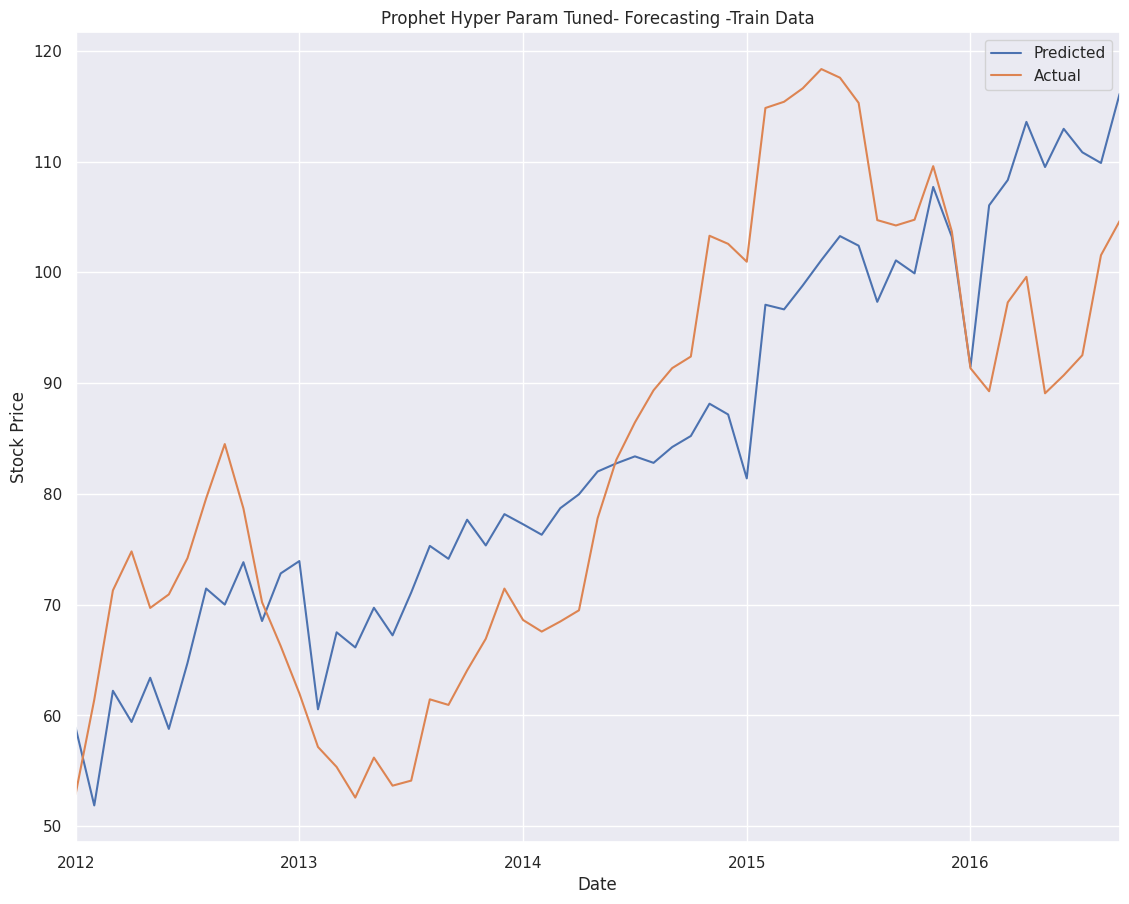

In [111]:
fig = plt.figure(figsize=(12,10))
prophet_hyper_df['Predicted'][:57].plot(label='Predicted')
prophet_hyper_df['Actual'][:57].plot(label='Actual')
plt.title('Prophet Hyper Param Tuned- Forecasting -Train Data')
plt.ylabel('Stock Price')
plt.legend()

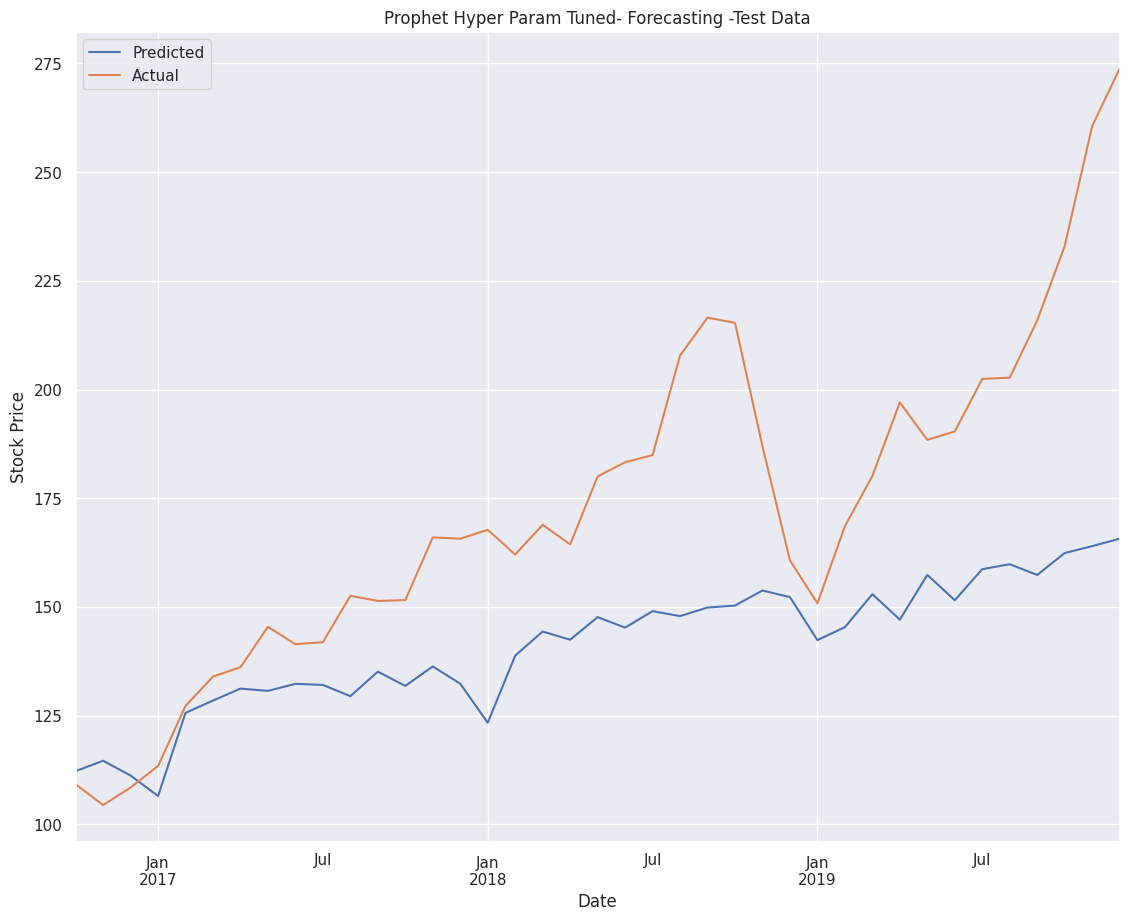

In [112]:
fig = plt.figure(figsize=(12,10))
prophet_hyper_df['Predicted'][57:].plot(label='Predicted')
prophet_hyper_df['Actual'][57:].plot(label='Actual')
plt.title('Prophet Hyper Param Tuned- Forecasting -Test Data')
plt.ylabel('Stock Price')
plt.legend()

In [113]:
result_metrics(prophet_hyper_df['Actual'][:67],prophet_hyper_df['Predicted'][:67],'Hyper-Tuned Prophet Train Data')


Result Metrics for Hyper-Tuned Prophet Train Data
R2 Score :  0.784
Mean Squared Error :  129.543
Mean Absolute Error :  9.986


In [114]:
result_metrics(prophet_hyper_df['Actual'][67:],prophet_hyper_df['Predicted'][67:],'Hyper-Tuned Prophet Test Data')


Result Metrics for Hyper-Tuned Prophet Test Data
R2 Score :  -1.311
Mean Squared Error :  2188.439
Mean Absolute Error :  40.508


After Hyper-parameter tuning the model is not able to capture the seasonality and sudden jump in time series in the Year 2017 onwards.

->Prophet is easily overfitted.

->Seasonal ARIMA is superior to Prophet

->Prophet is good at capturing the trend.

->By creating Extra Regressors we can maybe improve the Results in future projects.

Advantages of Prophet includes very easy to implement, fast , and less statistical know-how model .

Actionable Insight
Observing the Trend given by the Model.

AAPL IS A BUY.